# PART2-NEURAL NETWORK TRAINING  
## Section 1-Data and data processing

### 15 Extract, Transform, And Load (ETL) With PyTorch
Extract data from a data source.  
Transform data into a desirable format.  
Load data into a suitable structure.  

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = 'data/'
    ,train=True
    ,download=False
    ,transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

In [3]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=1000
    ,shuffle=True
)

### 16Training Set Exploration For Deep Learning And AI

In [6]:
print(len(train_set))
print(train_set.targets)
# target.bincount 种类分布个数
print(train_set.targets.bincount())

60000
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


In [7]:
# 一个一个取
sample = next(iter(train_set))
print(len(sample))

2


In [10]:
image, label =sample
print(type(image))
print(type(label))
print(image.shape)
print(torch.tensor(label).shape)
#去掉image中 长度为1的0维度
print(image.squeeze().shape)

<class 'torch.Tensor'>
<class 'int'>
torch.Size([1, 28, 28])
torch.Size([])
torch.Size([28, 28])


tensor(9)

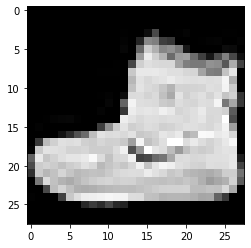

In [14]:
#可视化image
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(),cmap="gray")
torch.tensor(label)

#### batch 批量

In [15]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)

batch = next(iter(display_loader))
print(len(batch))

2


In [17]:
images,labels = batch
print(type(images),type(labels))
print(images.shape,labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


torch.Size([1, 28, 28])
tensor(9)
labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


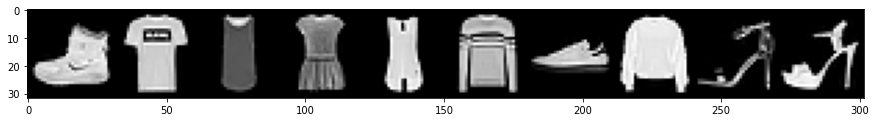

In [18]:
import numpy as np
print(images[0].shape)
print(labels[0])
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))#plt.imshow(grid.permute(1,2,0))

print('labels:',labels)

#### 画图 dataloader

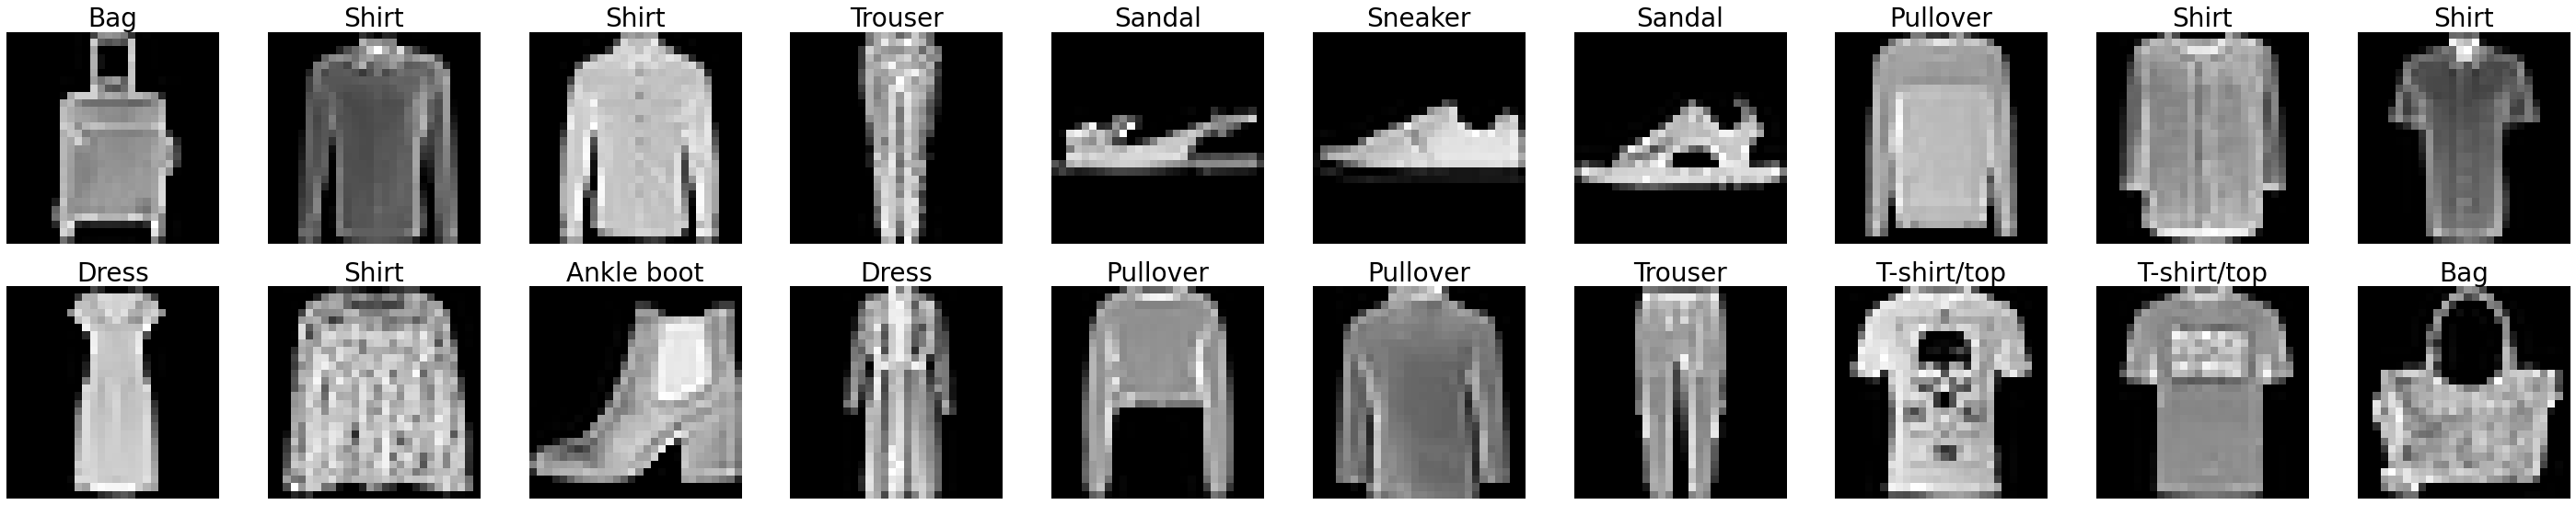

20


In [28]:
#只显示20个
how_many_to_plot = 20
#batch_size=1 每批支取一个
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(50,50))
count = 0
for i, batch in enumerate(train_loader, start=1):
    count +=1
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()
print(count)


-Coat-Ankle boot-Bag-Shirt-Ankle boot-Trouser-Sneaker-Coat-Ankle boot-Trouser
-Ankle boot-Dress-Ankle boot-T-shirt/top-Dress-Sandal-Coat-Dress-Shirt-T-shirt/top
-Pullover-T-shirt/top-Sneaker-Sandal-T-shirt/top-Shirt-Dress-Sandal-Sandal-Pullover
-Coat-Coat-Shirt-Shirt-Dress-Bag-Sandal-Sneaker-Ankle boot-Shirt
-Bag-Dress-Trouser-Trouser-Coat-Ankle boot-Pullover-Bag-T-shirt/top-Sneaker
-Shirt-Pullover-Sneaker-Pullover-Ankle boot-Dress-T-shirt/top-Coat-T-shirt/top-Sandal


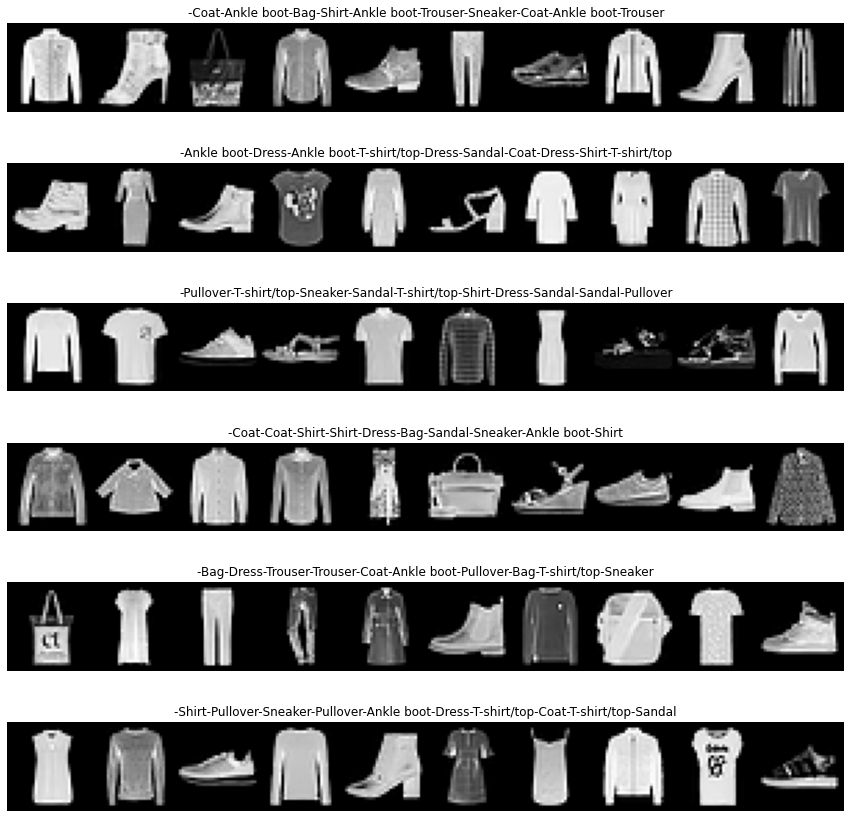

In [75]:
#只显示20个
how_many_to_plot = 6
#batch_size=1 每批支取10个
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10, shuffle=True
)

plt.figure(figsize=(15,15))
count = 0
for i, batch in enumerate(train_loader, start=1):
    count +=1
    images, labels = batch
    plt.subplot(6,1,i)
    grid = torchvision.utils.make_grid(images,nrow=10)
    plt.imshow(np.transpose(grid,(1,2,0)))#plt.imshow(grid.permute(1,2,0))

    plt.axis('off')
    title_t = ""
    for lll in labels:
        title_t = title_t +"-"+train_set.classes[lll.item()]
    print(title_t)
    plt.title(title_t)
    if (i >= how_many_to_plot): break
plt.show()